In [59]:
##Support vector Machine 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250
sns.set_style('darkgrid')
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.preprocessing import OrdinalEncoder

In [60]:
df=pd.read_csv(r"C:\Users\durwa\Downloads\svm data.csv")
df

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,863,sunken,scaly,brown,yes,foul,attached,crowded,narrow,chocolate,...,partial,orange,one,flaring,purple,abundant,leaves,poisonous,5.877891,17.464145
1996,1160,sunken,scaly,purple,yes,musty,attached,distant,narrow,red,...,partial,white,one,zone,yellow,numerous,waste,poisonous,6.500840,13.501957
1997,265,convex,grooves,green,yes,fishy,notched,close,narrow,pink,...,partial,brown,two,evanescent,yellow,abundant,woods,poisonous,13.558064,11.270020
1998,411,bell,smooth,white,no,pungent,free,close,narrow,orange,...,universal,yellow,one,cobwebby,brown,solitary,woods,poisonous,11.092703,8.423199


In [61]:
df.describe()

,Unnamed: 0,stalk_height,cap_diameter
count,2000.000000,2000.000000,2000.000000
mean,624.974000,8.449118,12.314345
std,375.091938,3.697217,7.048845
min,0.000000,2.000000,1.000000
25%,290.000000,5.291009,5.723521
50%,607.000000,8.318596,12.124902
75%,957.250000,11.781272,18.698606
max,1279.000000,15.095066,25.000054


In [62]:
df.isna().sum()

Unnamed: 0                  0
cap_shape                   0
cap_surface                 0
cap_color                   0
bruises                     0
odor                        0
gill_attachment             0
gill_spacing                0
gill_size                   0
gill_color                  0
stalk_shape                 0
stalk_root                  0
stalk_surface_above_ring    0
stalk_surface_below_ring    0
stalk_color_above_ring      0
stalk_color_below_ring      0
veil_type                   0
veil_color                  0
ring_number                 0
ring_type                   0
spore_print_color           0
population                  0
habitat                     0
class                       0
stalk_height                0
cap_diameter                0
dtype: int64

<Axes: >

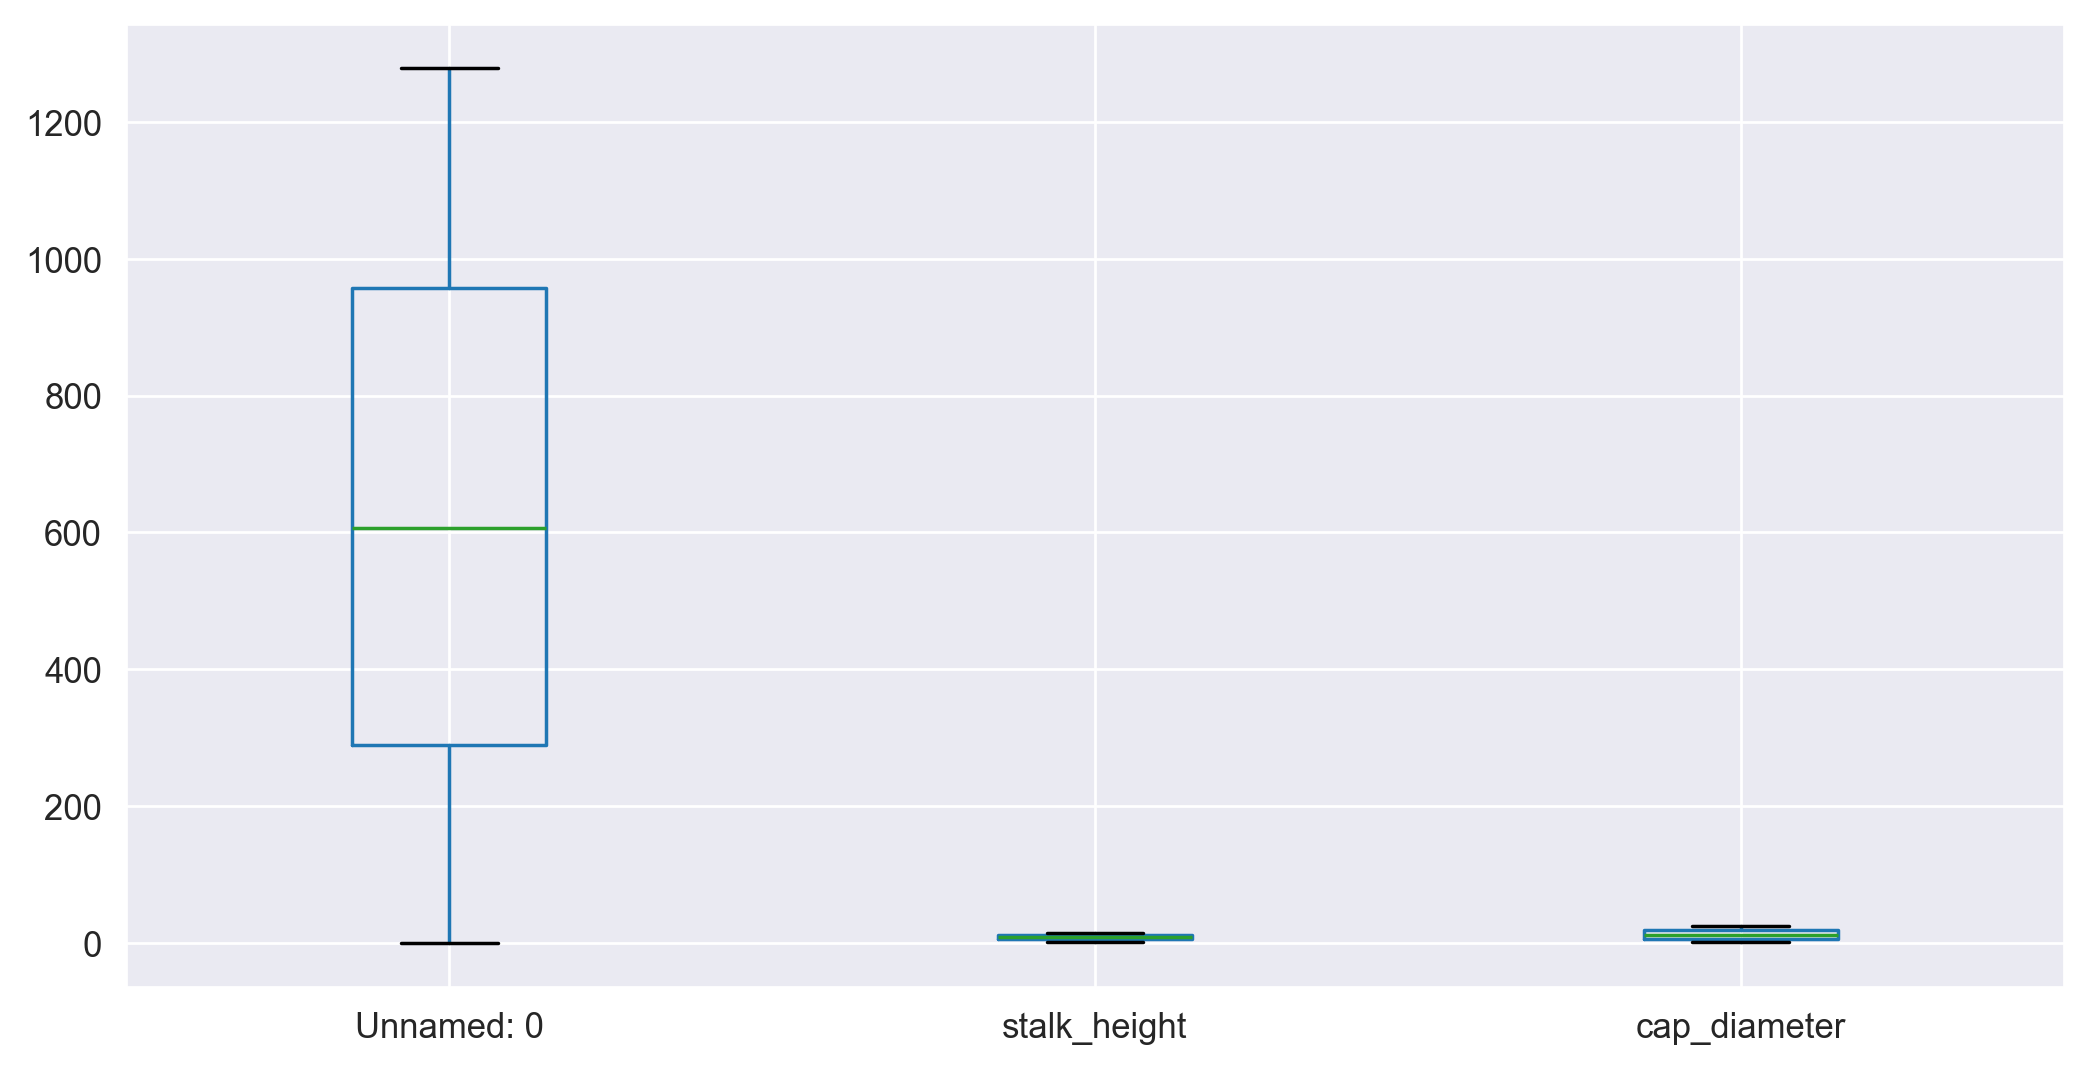

In [63]:
df.boxplot()

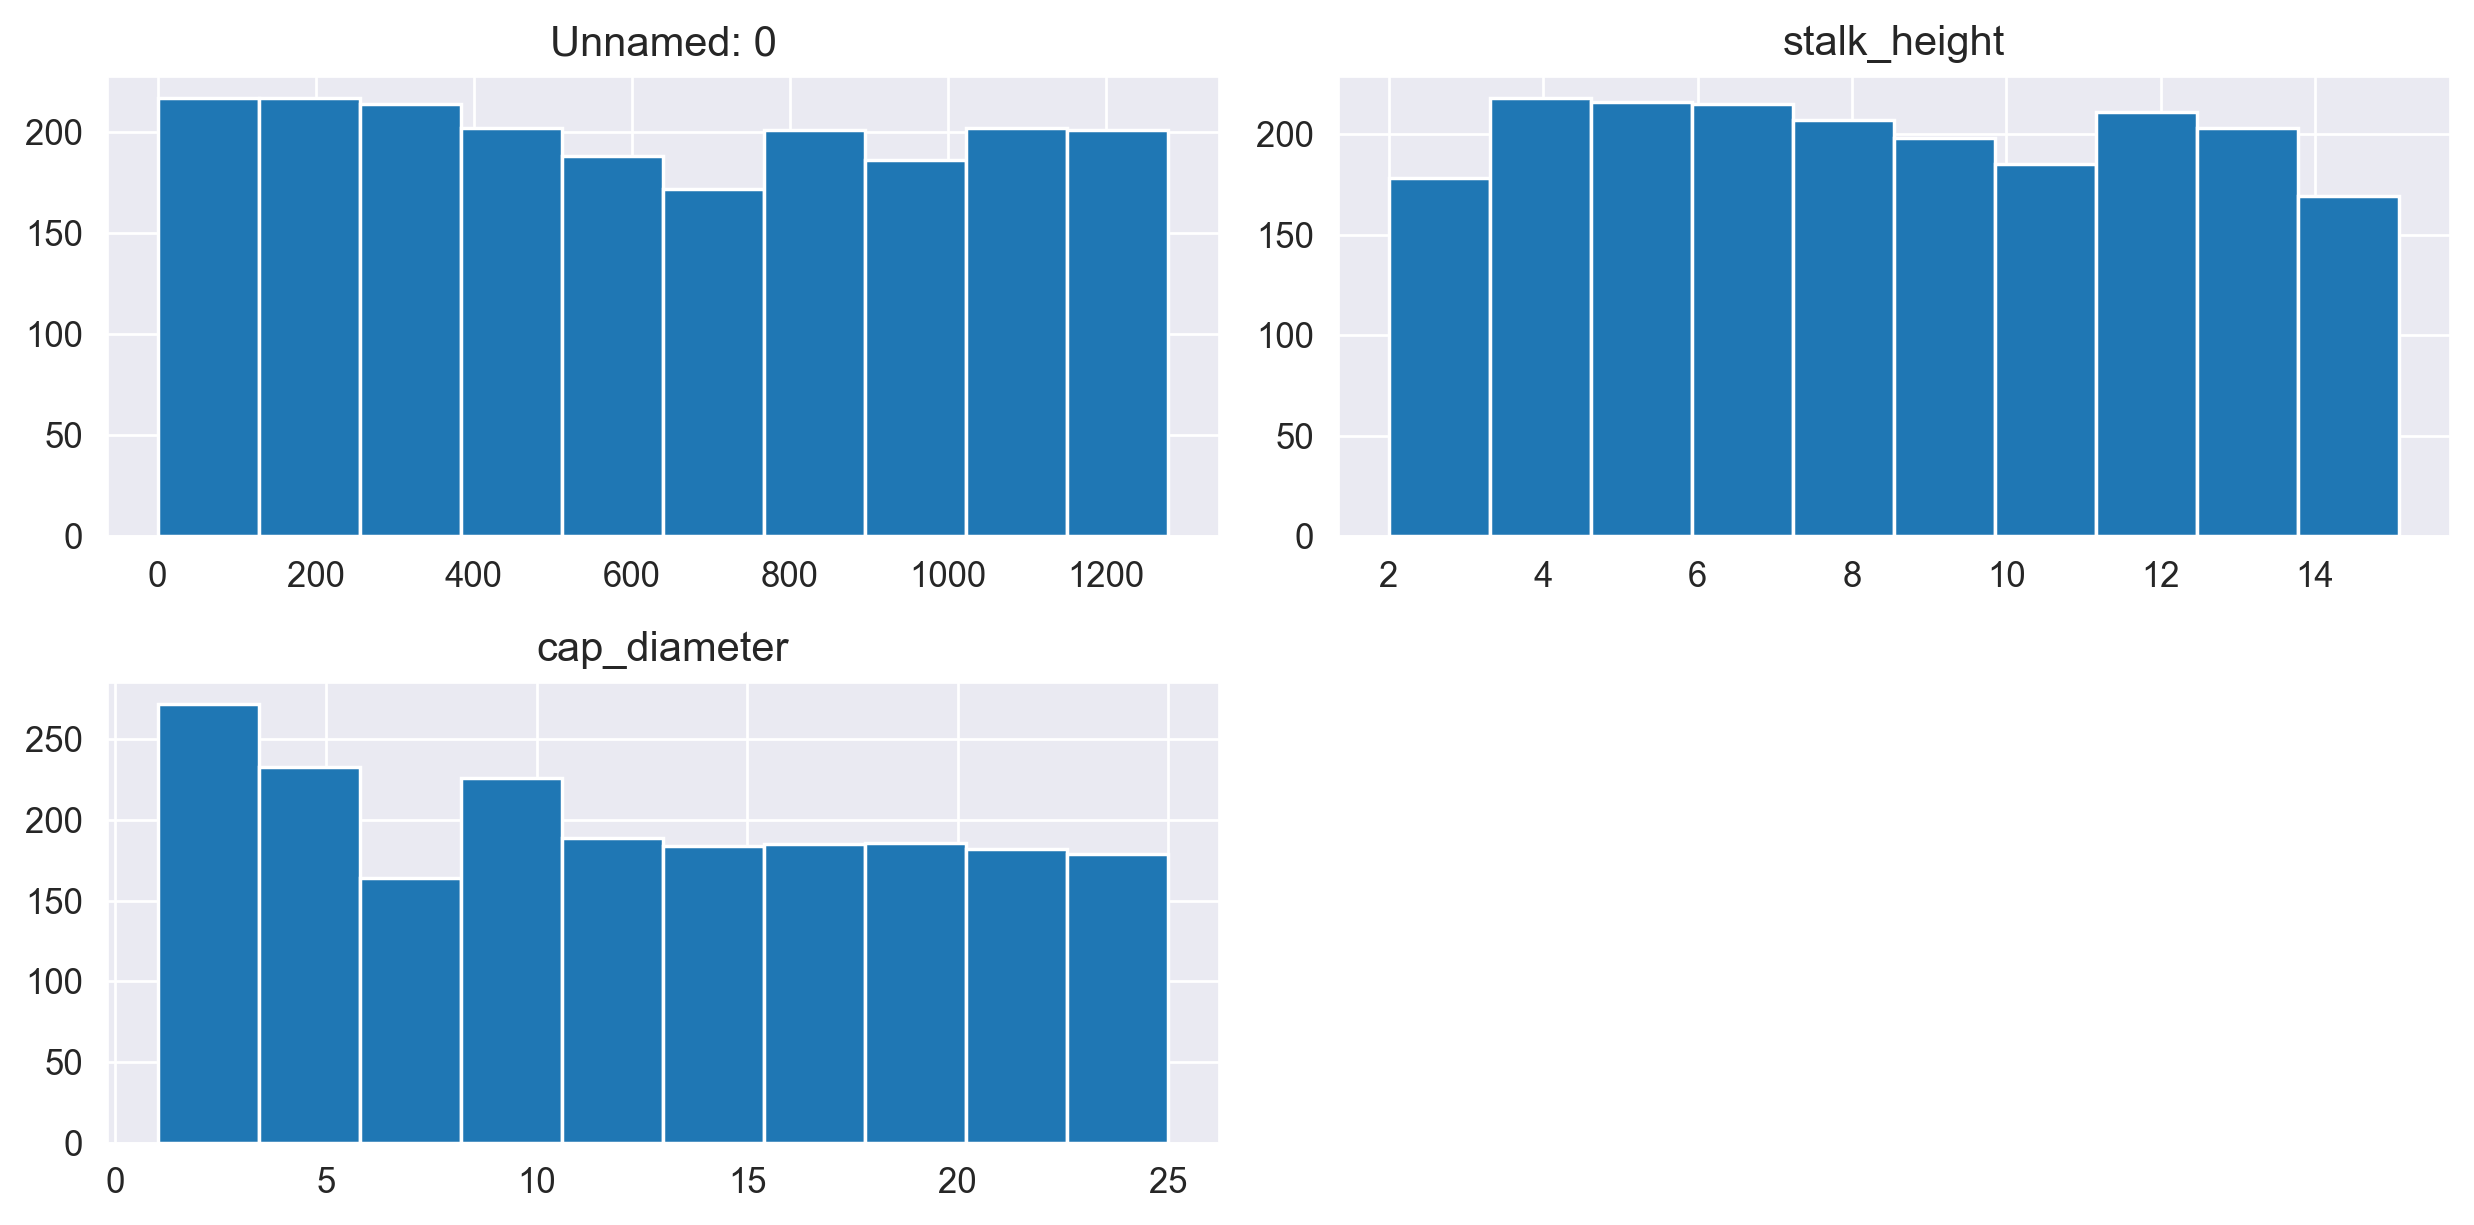

In [64]:
df.hist()
plt.tight_layout()

In [65]:
df.columns

Index(['Unnamed: 0', 'cap_shape', 'cap_surface', 'cap_color', 'bruises',
       'odor', 'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color',
       'stalk_shape', 'stalk_root', 'stalk_surface_above_ring',
       'stalk_surface_below_ring', 'stalk_color_above_ring',
       'stalk_color_below_ring', 'veil_type', 'veil_color', 'ring_number',
       'ring_type', 'spore_print_color', 'population', 'habitat', 'class',
       'stalk_height', 'cap_diameter'],
      dtype='object')

<Axes: xlabel='stalk_height', ylabel='cap_diameter'>

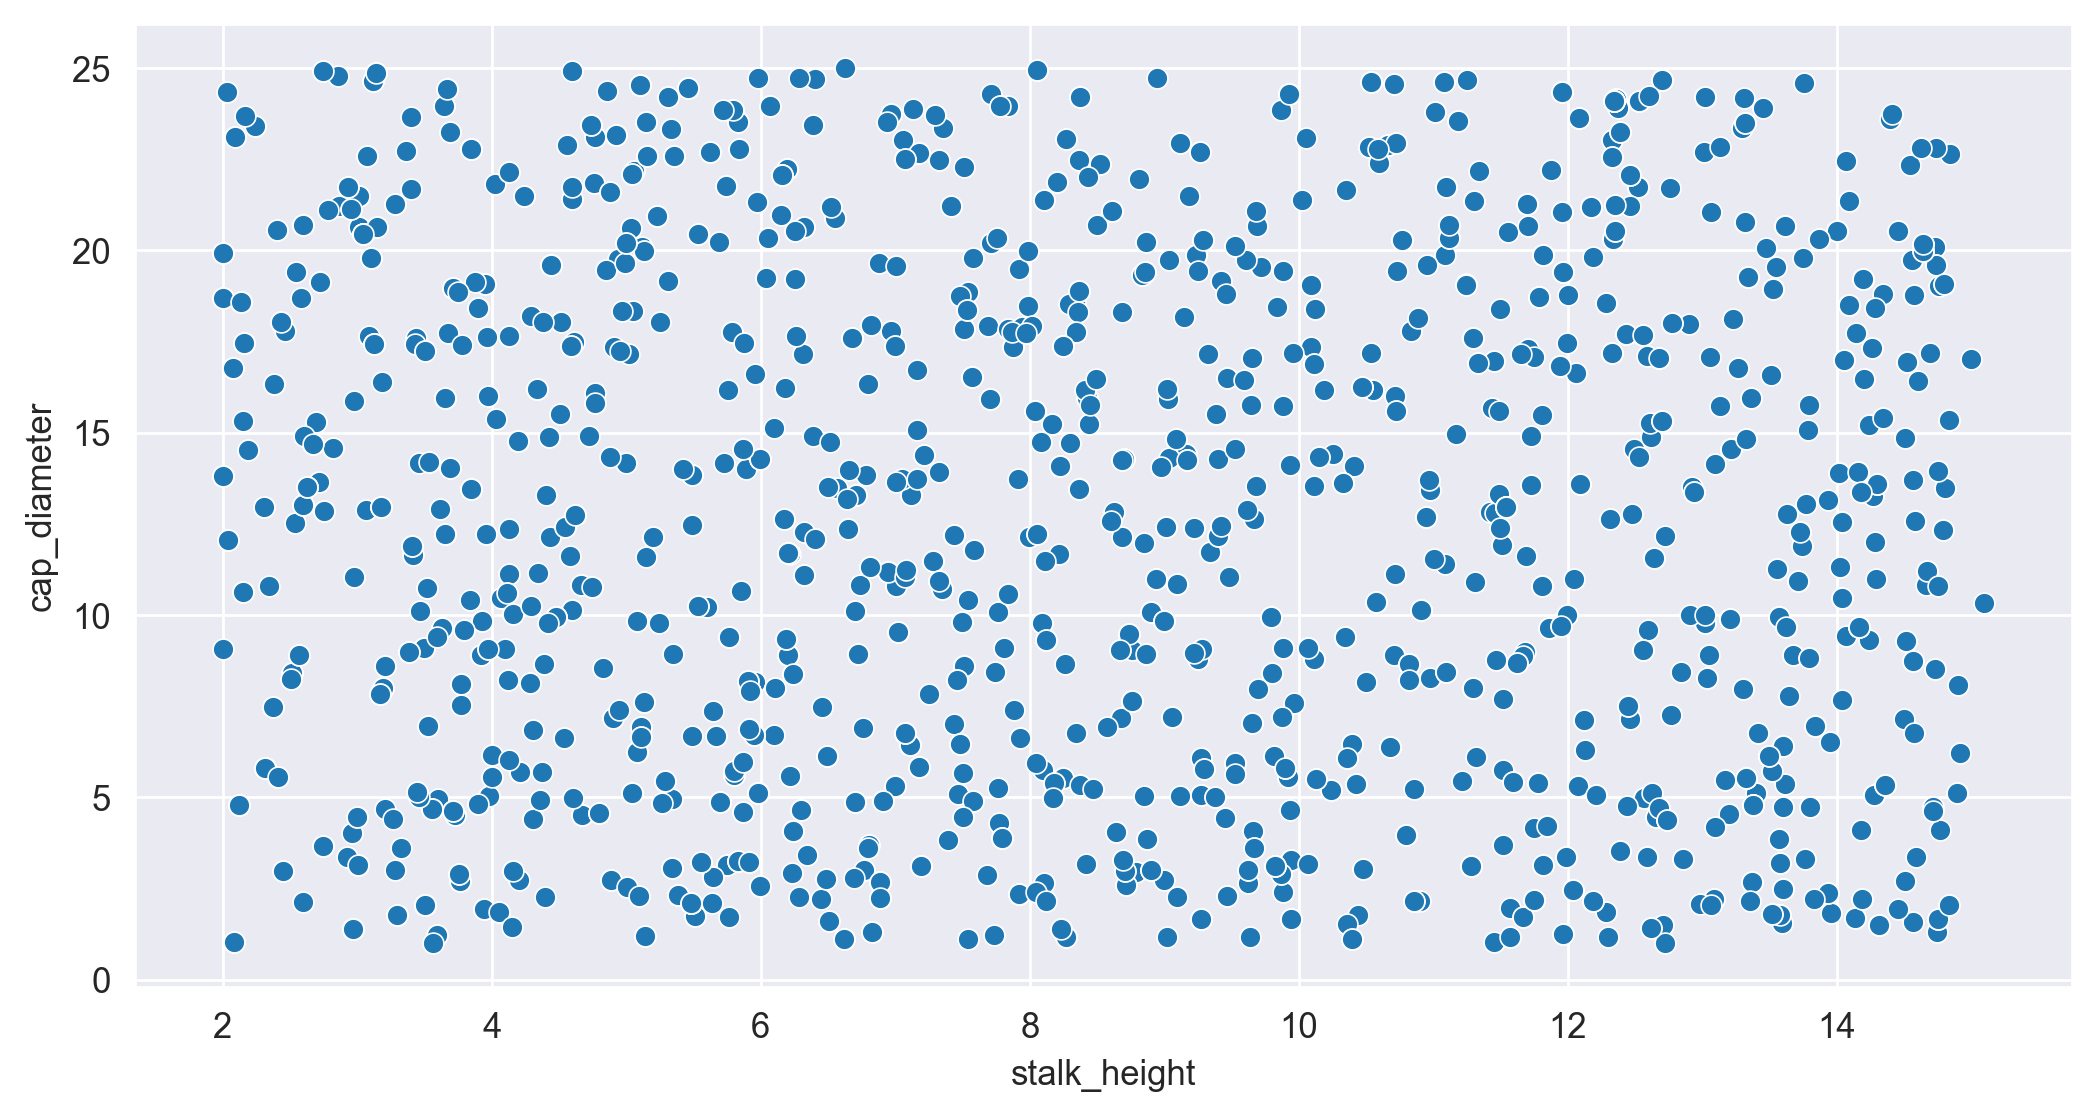

In [66]:
sns.scatterplot(x = df['stalk_height'],y = df['cap_diameter'])

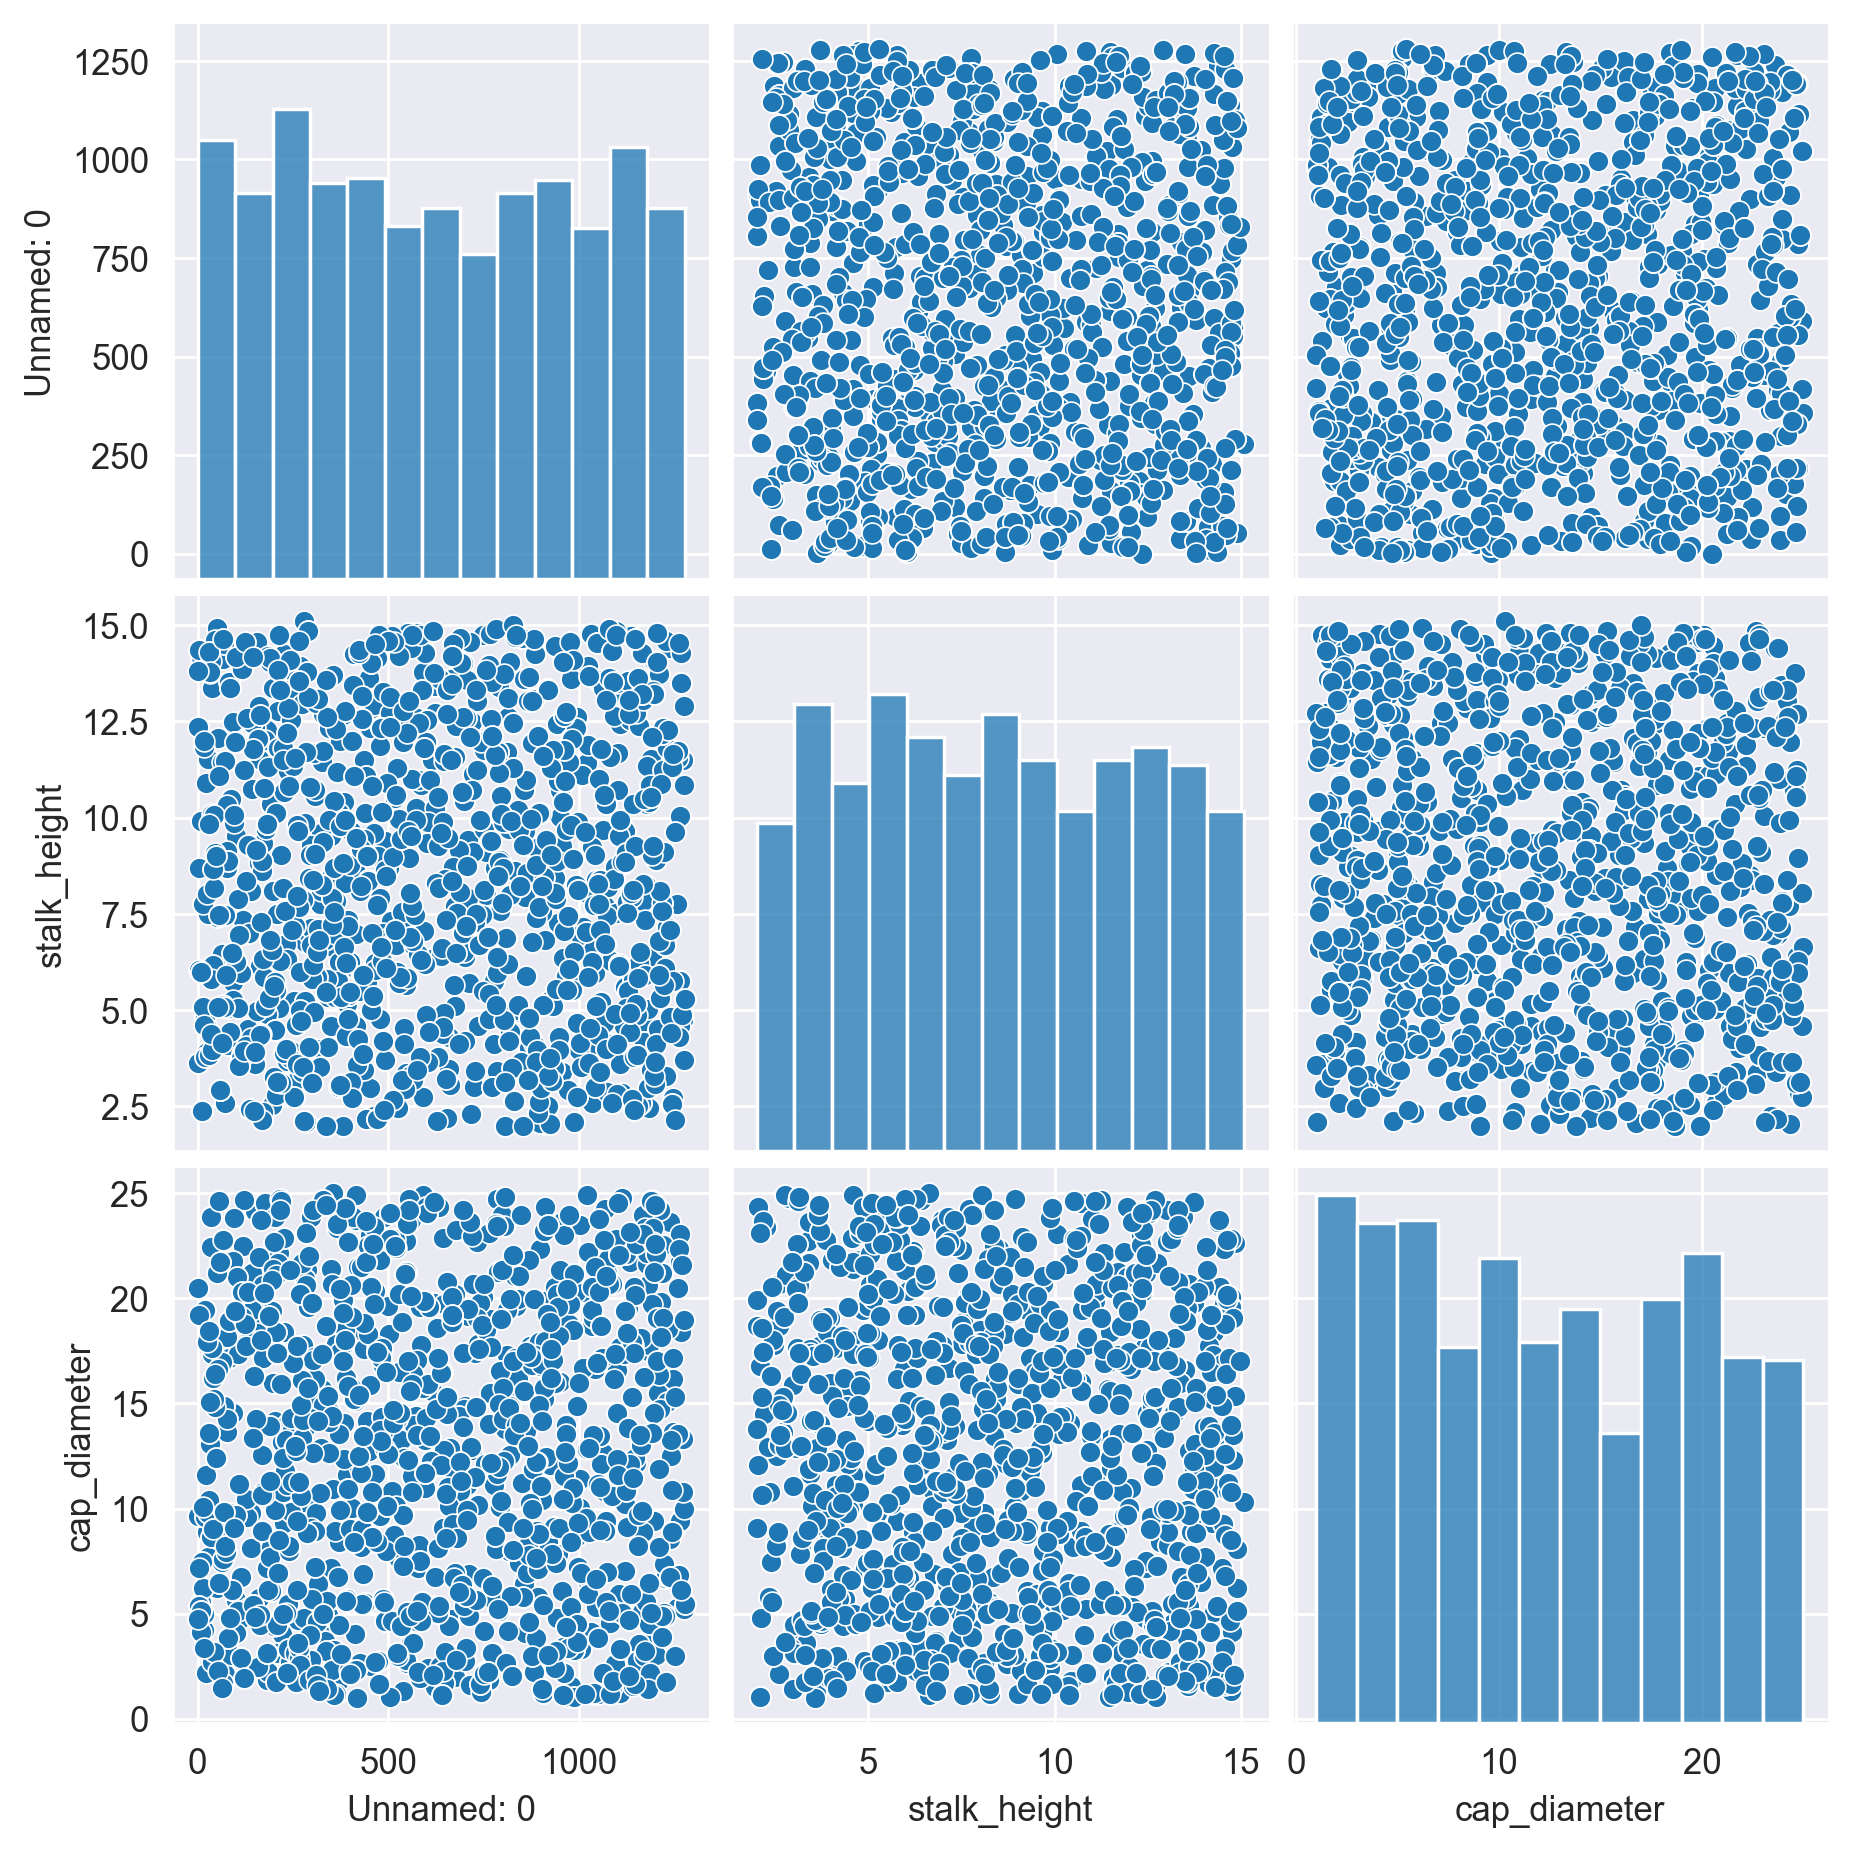

In [67]:
sns.pairplot(df)

In [68]:
#Correlation coefficient

In [69]:
df.corr()

,Unnamed: 0,stalk_height,cap_diameter
Unnamed: 0,1.000000,-0.001508,0.051881
stalk_height,-0.001508,1.000000,-0.003486
cap_diameter,0.051881,-0.003486,1.000000


<Axes: >

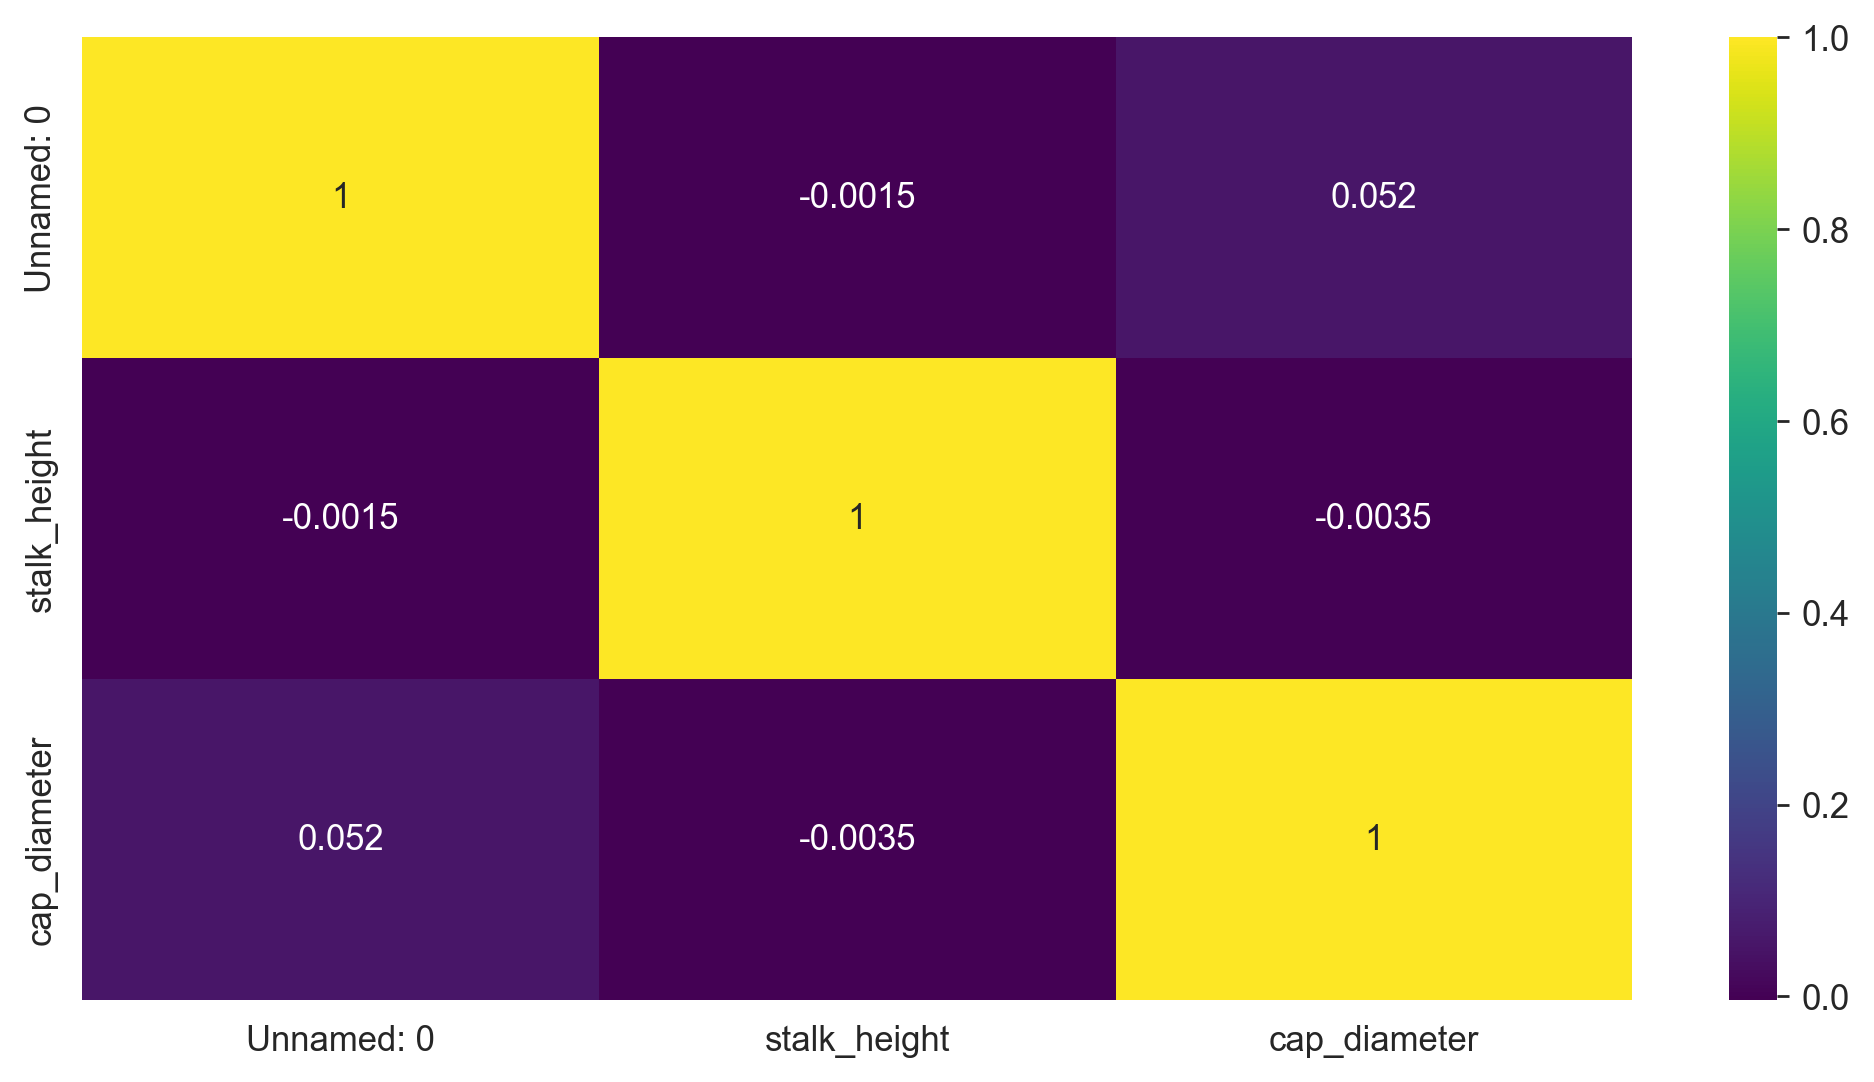

In [70]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='viridis')

In [71]:
df.dtypes

Unnamed: 0                    int64
cap_shape                    object
cap_surface                  object
cap_color                    object
bruises                      object
odor                         object
gill_attachment              object
gill_spacing                 object
gill_size                    object
gill_color                   object
stalk_shape                  object
stalk_root                   object
stalk_surface_above_ring     object
stalk_surface_below_ring     object
stalk_color_above_ring       object
stalk_color_below_ring       object
veil_type                    object
veil_color                   object
ring_number                  object
ring_type                    object
spore_print_color            object
population                   object
habitat                      object
class                        object
stalk_height                float64
cap_diameter                float64
dtype: object

In [93]:
cat_cols = df.select_dtypes(object).columns
cat_cols

Index([], dtype='object')

In [84]:
oe = OrdinalEncoder()

df[cat_cols] = oe.fit_transform(df[cat_cols])

In [85]:
df[cat_cols] 

""
0
1
2
3
4
...
1995
1996
1997
1998


<Axes: xlabel='cap_surface', ylabel='gill_color'>

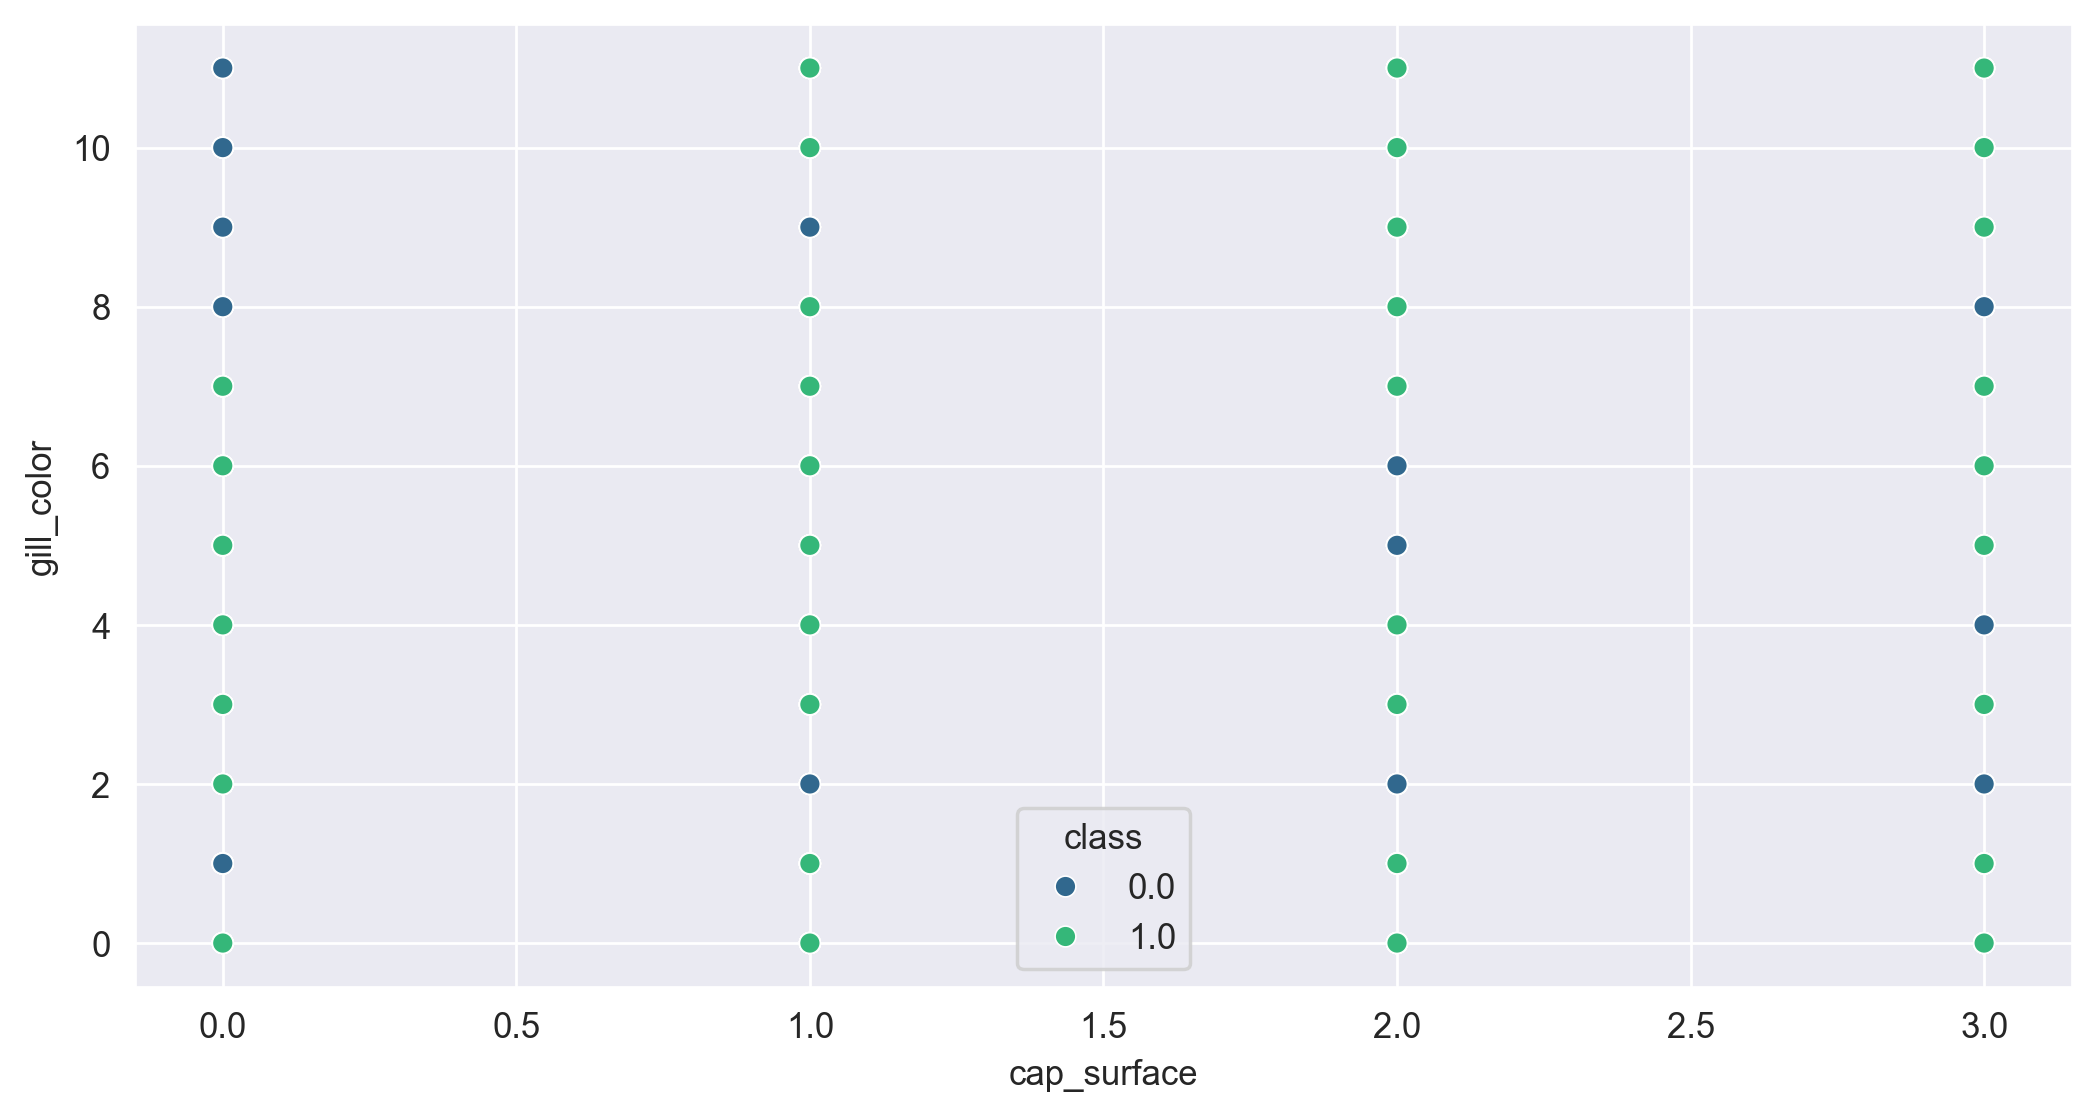

In [86]:
#2D scatterplot to understand the data.
sns.scatterplot(x= df['cap_surface'], y = df['gill_color'], hue=df['class'], palette='viridis')

<Axes: xlabel='cap_shape', ylabel='gill_attachment'>

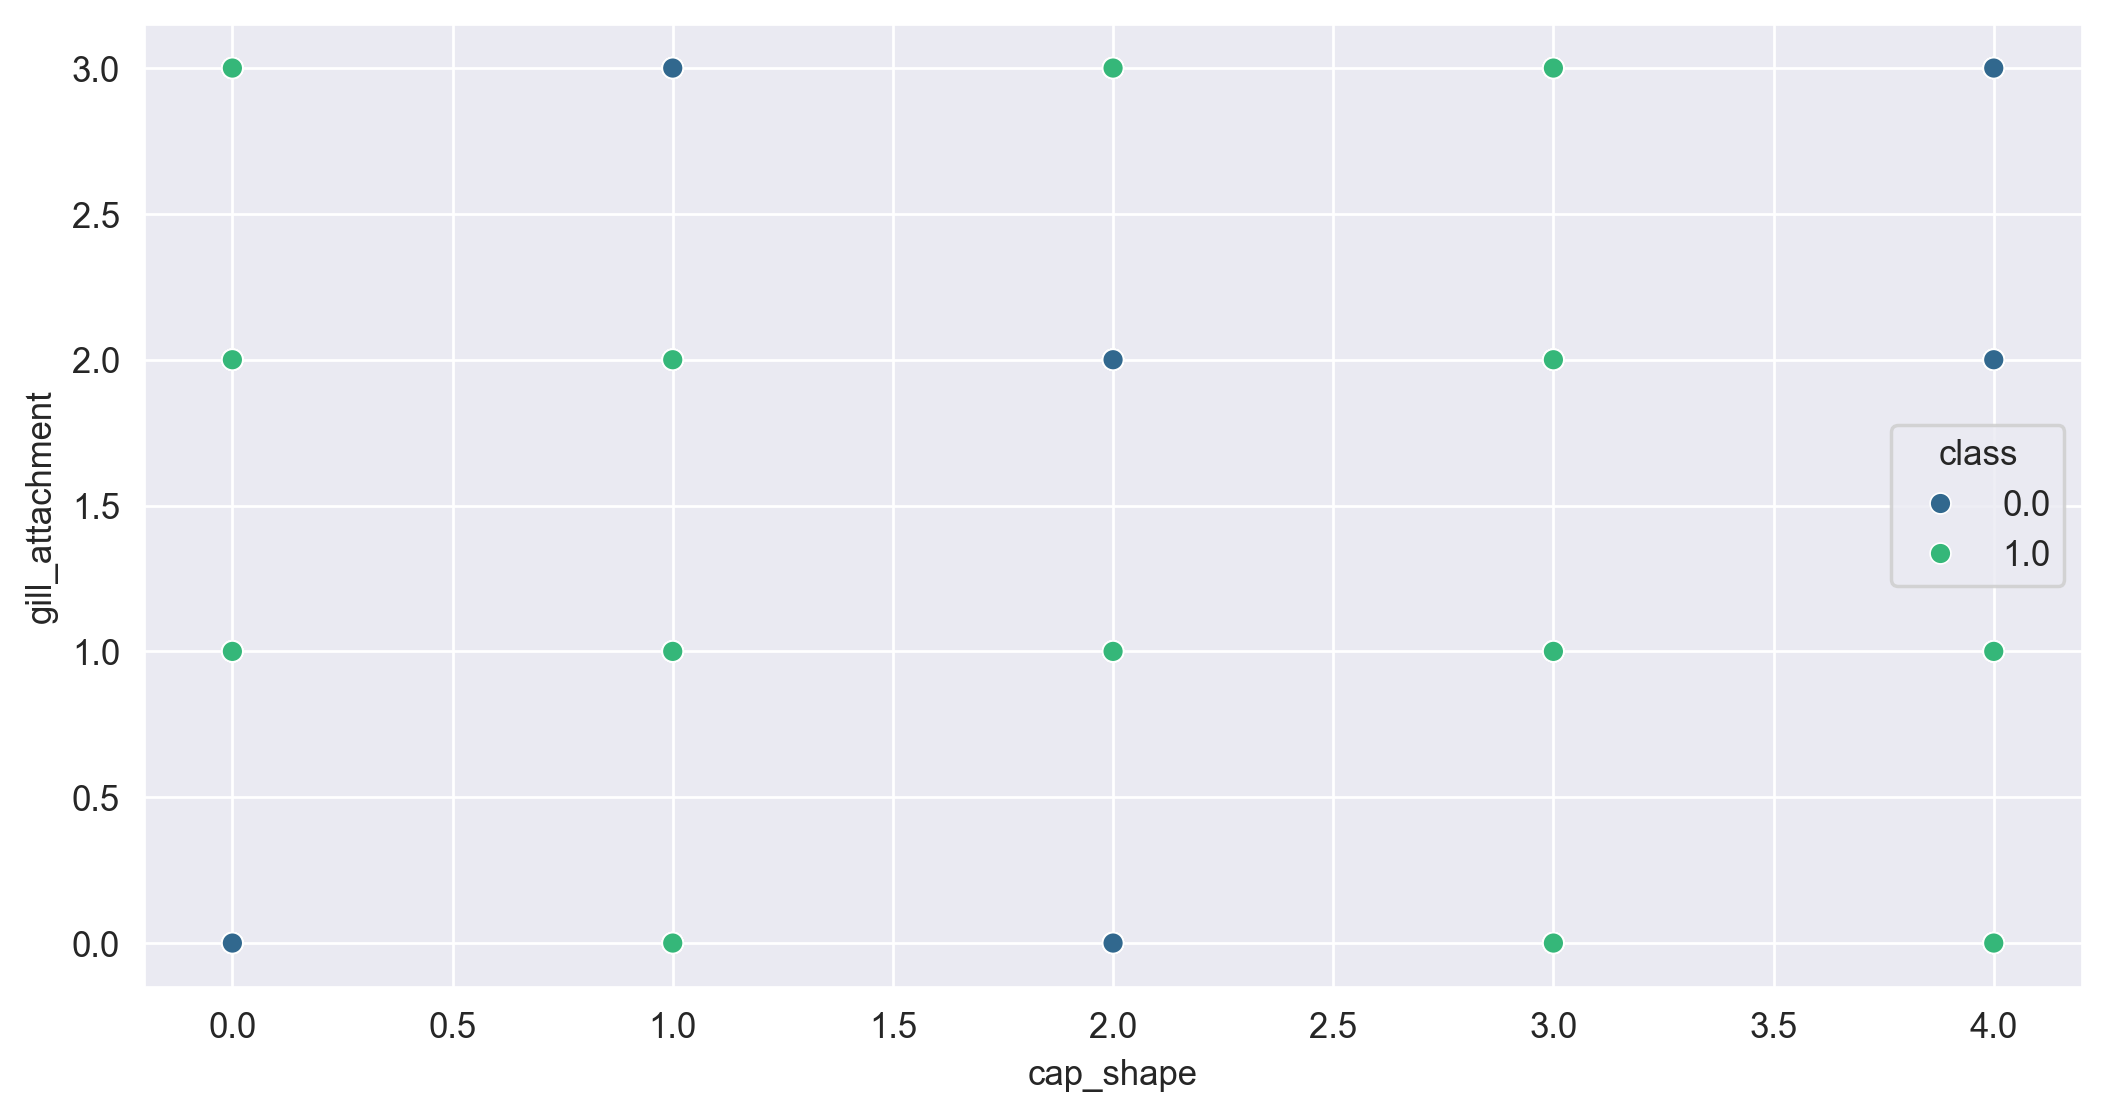

In [87]:
sns.scatterplot(x= df['cap_shape'], y = df['gill_attachment'], hue=df['class'], palette='viridis')

In [88]:
import plotly.express as pe

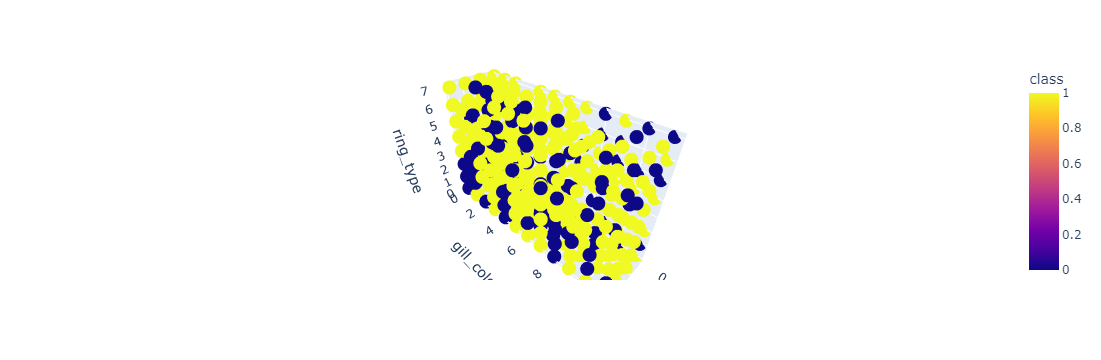

In [89]:
pe.scatter_3d(data_frame=df,x = 'cap_surface',y = 'gill_color',z = 'ring_type', color = 'class')

In [98]:
#model bulding
x = df.iloc[:,:-1]
y=df['class']

In [99]:
from sklearn.model_selection import train_test_split

In [100]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y, test_size=0.2, random_state=1)
svc = SVC()

svc.fit(xtrain,ytrain)
ypred = svc.predict(xtest)
print(svc.score(xtrain,ytrain))
print(svc.score(xtest,ytest))

0.7025
0.69


In [101]:
sc = StandardScaler()
x = sc.fit_transform(x)

In [102]:
xtrain

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height
0,1167,4.0,2.0,7.0,0.0,1.0,1.0,2.0,0.0,7.0,...,8.0,0.0,0.0,2.0,6.0,3.0,1.0,5.0,1.0,14.276173
816,371,1.0,0.0,0.0,0.0,4.0,3.0,2.0,1.0,11.0,...,2.0,0.0,3.0,1.0,4.0,5.0,4.0,4.0,1.0,6.241350
790,200,1.0,0.0,2.0,0.0,3.0,0.0,2.0,0.0,3.0,...,7.0,1.0,2.0,2.0,2.0,2.0,2.0,6.0,1.0,5.622111
361,355,1.0,2.0,5.0,0.0,3.0,1.0,0.0,1.0,3.0,...,3.0,1.0,0.0,1.0,7.0,8.0,5.0,3.0,0.0,13.707625
592,978,3.0,0.0,6.0,1.0,4.0,2.0,0.0,0.0,11.0,...,1.0,1.0,1.0,1.0,2.0,4.0,2.0,1.0,1.0,14.558263
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1791,490,0.0,0.0,7.0,0.0,4.0,3.0,0.0,0.0,2.0,...,6.0,0.0,2.0,0.0,2.0,4.0,3.0,1.0,0.0,2.407121
1096,598,0.0,2.0,6.0,1.0,3.0,2.0,1.0,1.0,11.0,...,4.0,0.0,0.0,2.0,5.0,6.0,3.0,1.0,0.0,6.205787
1932,808,2.0,1.0,6.0,0.0,7.0,3.0,1.0,0.0,2.0,...,5.0,1.0,0.0,0.0,6.0,4.0,0.0,1.0,0.0,3.140109
235,791,2.0,0.0,8.0,1.0,8.0,3.0,0.0,0.0,0.0,...,1.0,1.0,2.0,1.0,5.0,4.0,4.0,4.0,0.0,13.397992


In [103]:
x

array([[ 1.44540978,  1.35664266,  0.39842442, ...,  0.97916574,
         0.65465367,  1.57645935],
       [ 1.09874141,  1.35664266, -1.39628018, ...,  0.97916574,
        -1.52752523, -1.21646308],
       [-0.84260148,  0.66003539, -0.49892788, ...,  0.97916574,
         0.65465367,  0.16371736],
       ...,
       [-0.95993539, -0.03657188, -0.49892788, ...,  1.4865055 ,
         0.65465367,  1.38218107],
       [-0.57060014, -1.42978643,  1.29577672, ...,  1.4865055 ,
         0.65465367,  0.71519905],
       [ 1.19474188, -0.03657188,  0.39842442, ...,  0.47182598,
         0.65465367,  1.24916951]])

In [104]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y, test_size=0.2, random_state=1)
svc = SVC(kernel='poly')

svc.fit(xtrain,ytrain)
ypred = svc.predict(xtest)
print(svc.score(xtrain,ytrain))
print(svc.score(xtest,ytest))

1.0
1.0


In [108]:
#With help of GrideSearchCV -> Kernel
from sklearn.model_selection import GridSearchCV

In [109]:
param = {
    'kernel' : ['linear','rbf','poly','sigmoid']
}

In [110]:
grid = GridSearchCV(SVC(), param_grid= param, verbose=1)

In [111]:
grid.fit(xtrain,ytrain)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(estimator=SVC(),
             param_grid={'kernel': ['linear', 'rbf', 'poly', 'sigmoid']},
             verbose=1)

In [112]:
grid.best_params_

{'kernel': 'linear'}

In [113]:
svc = SVC(kernel='linear')

svc.fit(xtrain,ytrain)
ypred = svc.predict(xtest)
print(svc.score(xtrain,ytrain))
print(svc.score(xtest,ytest))

1.0
1.0


In [115]:
svc = SVC(kernel='sigmoid')

svc.fit(xtrain,ytrain)
ypred = svc.predict(xtest)
print(svc.score(xtrain,ytrain))
print(svc.score(xtest,ytest))

1.0
1.0


In [116]:
svc = SVC(kernel='rbf')

svc.fit(xtrain,ytrain)
ypred = svc.predict(xtest)
print(svc.score(xtrain,ytrain))
print(svc.score(xtest,ytest))

1.0
1.0


In [117]:
svc = SVC(kernel='poly')

svc.fit(xtrain,ytrain)
ypred = svc.predict(xtest)
print(svc.score(xtrain,ytrain))
print(svc.score(xtest,ytest))

1.0
1.0


In [114]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       124
         1.0       1.00      1.00      1.00       276

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400

